In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
from sklearn.utils import shuffle

In [2]:
data_table = pd.read_csv('data_regression.csv')

In [3]:
data_table.head(10)

,col,result
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


In [4]:
def predict(row,coef):
    
    ypred = coef[0]
    
    for i in range(len(row) - 1):
        
        ypred += coef[i + 1] * row[i]
        
    return ypred
    

In [5]:
def sgd(train,lr,epochs):
    coef = [0.0 for i in range(len(train[0]))]
    
    mse_history = []
    
    for epoch in range(epochs):
        
        shuffle(train)
        
        sum_error = 0
        
        for row in train:
            
            ypred = predict(row,coef)
            
            error = row[-1] - ypred
            sum_error += error**2
            
            coef[0] = coef[0] + lr * error
            
            for i in range(len(row) - 1):
                
                coef[i + 1] = coef[i + 1] + lr * error * row[i]
        
        mse_history.append(sum_error)    
                
    
    plt.plot(range(epochs),mse_history)
    
    return coef
            

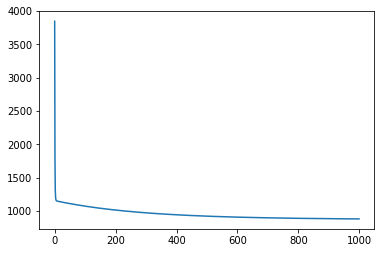

In [6]:
coef = sgd(data_table.values,0.0001,1000)